## 의사결정트리 및 앙상블 모델
-------------------------
### 트리 모델
* 의사결정나무( Decision Tree ) - 분류, 회귀에 모두 사용됨
    * ***Node*** : 데이터 질문지
    * True / False 로 결정
    * 순수 노드 : 더이상 질문이 필요없는 노드 = 한 쪽 클래스 계수가 0
    * 과적합 모델
        * 사전 가지치기 - 사이킷런
        * 사후 가지치기

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import os
import mglearn
import pandas as pd

import warnings


warnings.filterwarnings('ignore')

In [2]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

tree = DecisionTreeClassifier(random_state=0) #언제나 똑같은 질문지를 만들기 위함
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [3]:
print("훈련 세트 정확도 : {:.3f}".format(tree.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(x_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


* 훈련 세트 정확도가 100% 인 이유 => 모든 리프노드 = 순수노드

In [4]:
# 사전 가지치기 적용하기
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(x_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


* 트리 모델은 예측으로서도 Good
    * 특성 중요도를 볼 수 있다 => 트리 모델 분석의 메리트

In [5]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


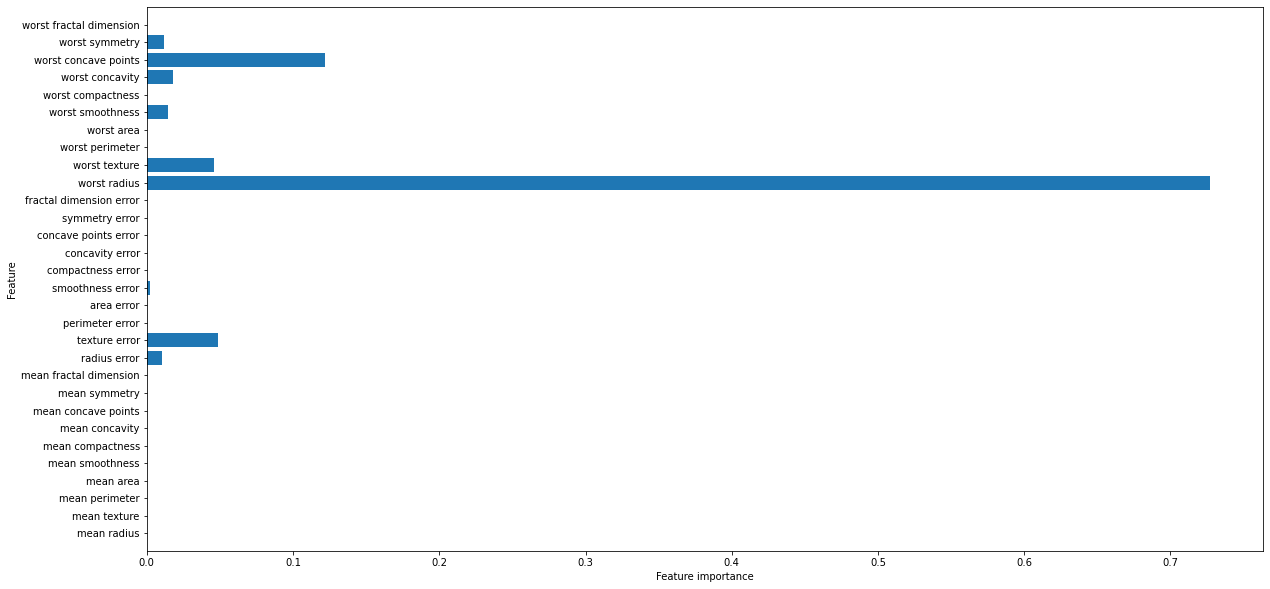

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(20, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    
plot_feature_importances_cancer(tree)

* 특성에 대한 선형 모델과 트리 모델의 차이

    * 선형 모델 : 가중치(weight) 사용 = 음수, 양수로 구분
        * 음수면 음성 클래스를 구분
        * 양수면 양성 클래스를 구분
    
    * 트리 모텔 : 특성 중요도만 확인
        * 어느 클래스를 지지하는지 알 수 없다

In [7]:
# 데이터 로드
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


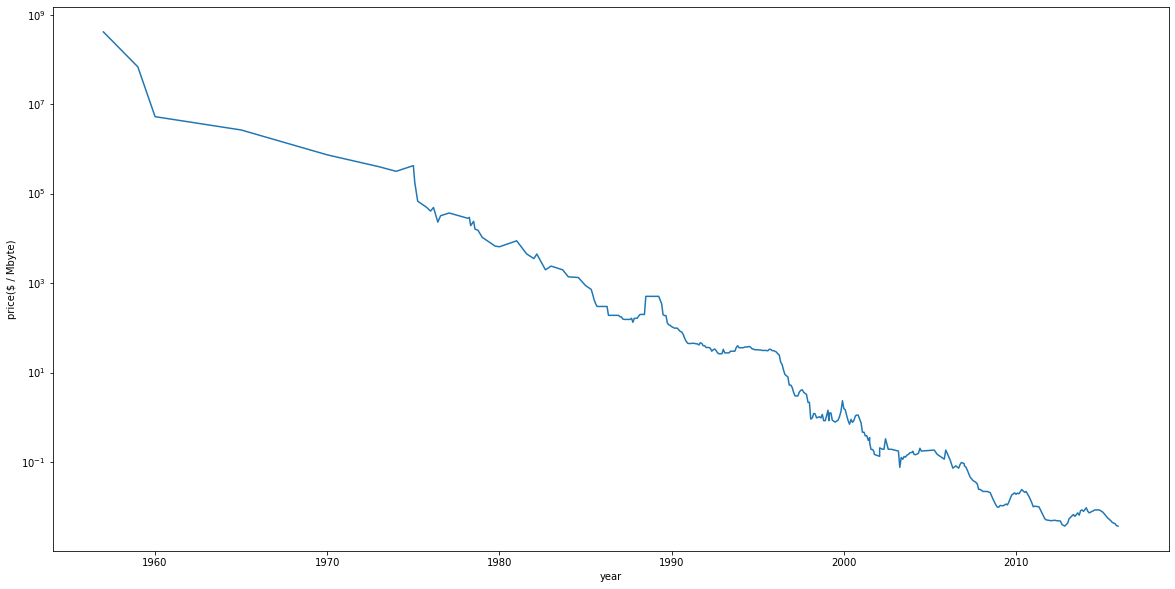

In [8]:
plt.figure(figsize=(20, 10))

# semilogy : y축 값이 너무 클 때, log를 사용하여 값의 편차를 줄인다
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price($ / Mbyte)')
plt.show()

In [9]:
# 가격 예측 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
# 모델의 데이터를 훈련시키기 위해서는 반드시 2차원 배열이여야 한다
# Series = 1차원
# newaxis 공부
x_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 관계를 간단하게 하기 위해서 로그스케일 적용
y_train = np.log(data_train.price)

In [10]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lin_reg = LinearRegression().fit(x_train, y_train)

In [11]:
# 예측용 데이터 만들기( 전체 기간 )
# 예측용, 테스트용 데이터는 무조건 train 데이터와 shape(-1)의 값이 똑같아야 한다
x_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = lin_reg.predict(x_all)

# semilogy 를 위해 로그스케일 값 원래대로 복구
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

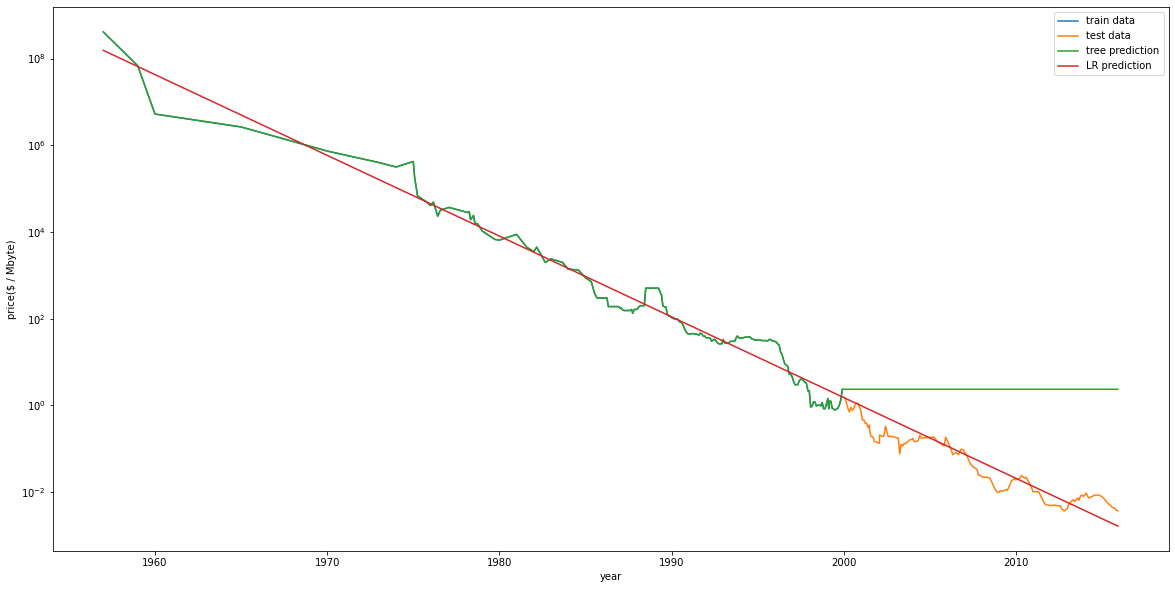

In [12]:
plt.figure(figsize=(20, 10))

plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='LR prediction')


plt.xlabel('year')
plt.ylabel('price($ / Mbyte)')
plt.legend()
plt.show()

* 결정 트리는 미래 예측이 불가

### 앙상블 모델
* 랜덤 포레스트( RandomForest )
* 그래디언트 부스팅( Gradient Boosting )

#### 랜덤 포레트스
* 과적합이 되어있는 트리를 여러개 사용
* 과적합이 된 트리는 **각자 다른 방향**으로 예측
    * 각자 다른 방향 = 무작위 특성을 활용
    * 무작위 특성 부여 방식 = **부트스트랩 샘플링(Bootstrap Sampling)**
        * 부트스트랩 : 전제 특성에서 무작위로 특성 선정( 중복 가능 )
    * 주요 하이퍼 파라미터
        * n_estimator : 랜덤 포레스트에서 사용할 나무의 개수( 클수록 복잡도 증가
        * n_sample
        * max_features : 부트스트랩 샘플링 ( 나무에 사용할 샘플의 개수 )
            * 값이 전체 특성의 개수와 같다면 무작위성이 안들어간다.
            * 값이 1일 경우 완전 무작위

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

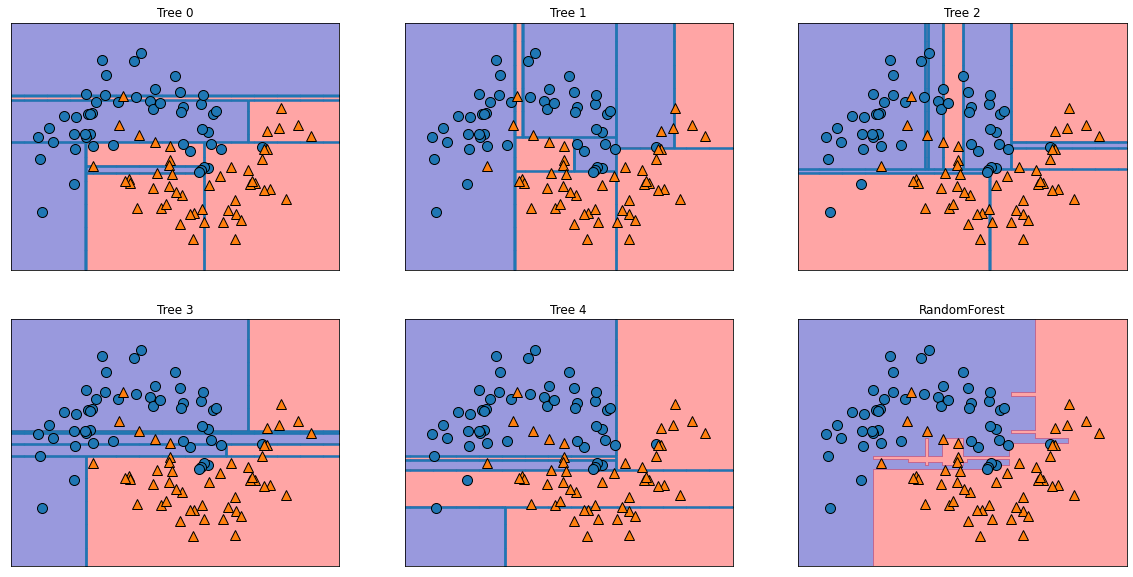

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("RandomForest")
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.show()

* 랜덤 포레스트는 과대적합 되어있는 여려개의 트리를 평균 낸다.

In [15]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


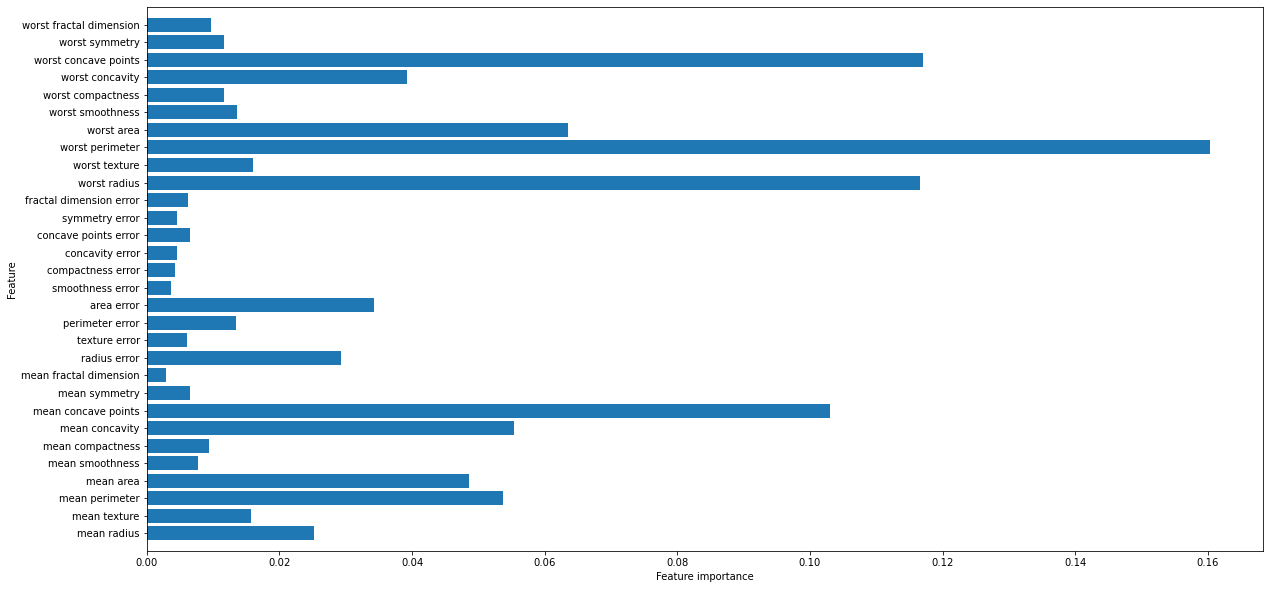

In [16]:
plot_feature_importances_cancer(forest)

#### 그라디언트 부스팅 회귀 트리
* 분류와 회귀 모두에서 사용 가능
* 과소적합된 트리를 여러개 이어가면서 학습시키는 방법(집단지성)
* 모든 특성을 사용하며, 약한 학습기를 여러 개 이어 붙이는 방식

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


* 일반적으로 그라디언트 부스팅 회귀 트리는
    * learnig_rate
    * max_depth
* 하이퍼 파라미터로 복잡도를 조절한다

In [18]:
# 최대 깊이(max depth) 조절하기

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [19]:
# 학습률 (learning rate) 조절하기

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


## SVM (Support Vector Machine)
* 선형 SVM( LinearSVC, LinearSVR )
    * 직선을 투영하는 방식
* 비선형 SVM( 커널 SVM )
    * 일반적인 SVM

* SV(Support Vector)를 훈련 시에 데이터 포인트로부터 선정,서포트 벡터의 개수와 범위를 지정하면서 복잡도를 조절한다

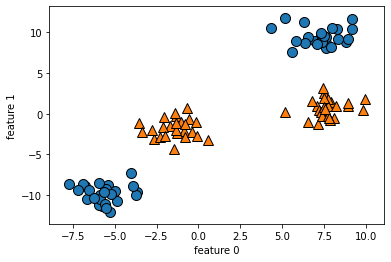

In [20]:
from sklearn.datasets import make_blobs

x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

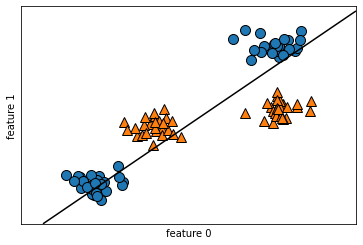

In [21]:
# 선형 모델 LinearSVC를 이용해서 직선으로 결정경계 만들기
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(x, y)

mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:,0], x[:,1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

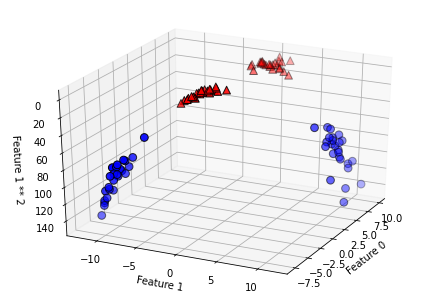

In [22]:
x_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 그리고 다음 y == 1 인 포인트를 그리기
mask = y == 0
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

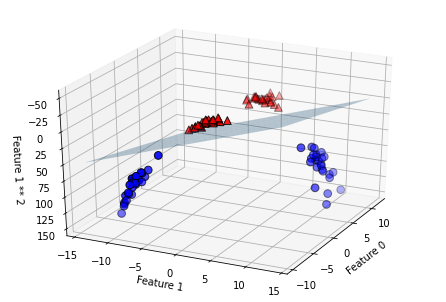

In [23]:
linear_svm_3d = LinearSVC().fit(x_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(x_new[:, 0].min() - 2, x_new[:, 0].max() + 2, 50)
yy = np.linspace(x_new[:, 1].min() - 2, x_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

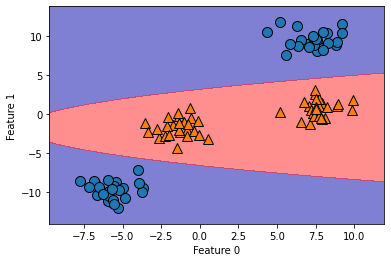

In [24]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

* 위 방식을 다차항 추가 기법이라고 한다.
* 실무에서는 어떠한 특성을 제곱하고나 세제곱 등을 해서 차원을 늘려갈지 미지수.. => 분석을 통해 알아내야 한다.
* 차원에 많이 늘어 날 수도 있다. => 데이터가 복잡해진다

### 커널 svm
* 수학적 기교를 사용하는 것이 아님 커널 트릭(**kernel trick**)을 이용하는 방식
    * RBF(radial basis function) : 가우시안 커널 $k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$
* 커널 svm이 훈련되면서 하는 일들
    * svm 모델이 배우는 것
        : **훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습**
    * 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 미친다. **두 클래스 사이의 경계에 위치한 데이터 포인트**
    * 이 데이터 포인트를 **서포트 벡터(Support Vector)**라고 한다.
    * 가우시안 커널 폭의 거리는 최대 마진 거리로 만들어 진다.

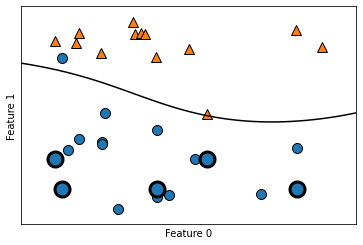

In [25]:
from sklearn.svm import SVC
x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(x, y)

mglearn.plots.plot_2d_separator(svm, x, eps=0.5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

#서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

* SVM의 하이퍼 파라미터
    * gamma
        * 가우시안 커널폭의 **역수**
        * gamma 매개변수가 하나의 훈련 샘플에 미치는 영향의 범위를 설정
        * gamma가 커지면 복잡도가 올라감
        * 연관성 있는 데이터 포인트 끼리의 모임을 만든다
        
    * C
        * 서포트 벡터 선정에 영향을 미치는 규제 매개 변수
        * 각 데이터 포인트의 중요도 값을 제지한다.
        * 서포트 벡터 == 포인트 중요도
            * 포인트 중요도 : 결정경계를 구성하는데 어떠한 역할을 하는지

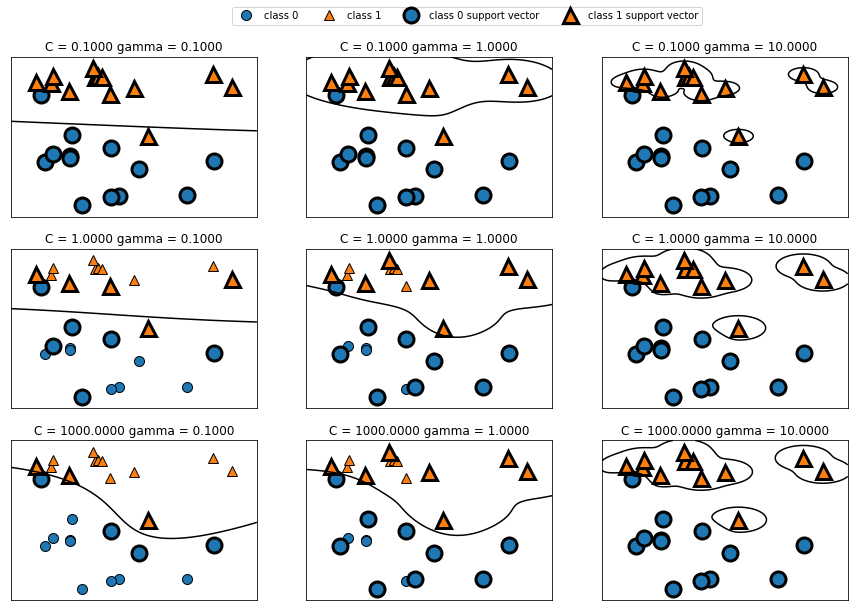

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]) :
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

In [27]:
# SVM 으로 유방암 데이터셋 처리하기

cancer = load_breast_cancer()

x_train, x_test, y_test, y_test = train_test_split(cancer.data,
                                                  cancer.target,
                                                  random_state=0)

svc = SVC()
svc.fit(x_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(svc.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(x_test, y_test)))

훈련 세트 정확도 : 0.904
테스트 세트 정확도 : 0.937


* 유방암 데이터셋은 특성사이의 스케일의 차이가 크다

* SVM은 데이터 특성사이의 스케일이 작을 때가 좋기 때문에 보통 MinMaxSCaler를 많이 사용한다.

## 구간 분할과 다항식 추가 기법

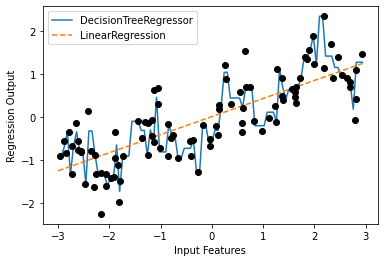

In [28]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line),'--',label="LinearRegression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc='best')
plt.show()

### 구간 분할(bining) 이란

In [29]:
# 구간 데이터 만들기
bins = np.linspace(-3, 3, 11)
print("구간 정보 : {}".format(bins))

구간 정보 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [30]:
# 각 데이터 포인트의 구간(bins) 구해주기
# np.digitize

which_bin = np.digitize(X, bins=bins)
print("데이터 포인트 : \n", X[: 5])
print("데이터 포인트의 소속 구간 : \n", which_bin[: 5])

데이터 포인트 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
데이터 포인트의 소속 구간 : 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # 희소행렬 사용 X

# 구간 데이터는 카테고리 데이터 입니다. 따라서 One Hot Encoding을 수행합니다.
X_binned = encoder.fit_transform(which_bin)

print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


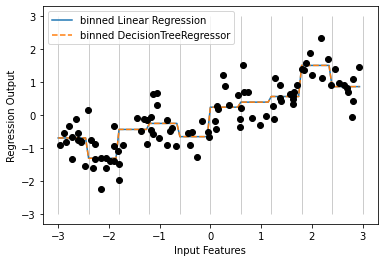

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y) # 소속 구간에 들어있는 타겟 y를 훈련 시킴
plt.plot(line, reg.predict(line_binned), label="binned Linear Regression")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='binned DecisionTreeRegressor')

plt.plot(X[:, 0], y, 'o', c='k')

# 구간데이터 수직선 그리기
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.show()

* 수평선이 의미하는 바는 각 구간 **y**의 평균

### 상호작용

In [33]:
# 전체 데이터와 구간 데이터를 합친다
X_combined = np.hstack([X, X_binned])
X_combined.shape

(100, 11)

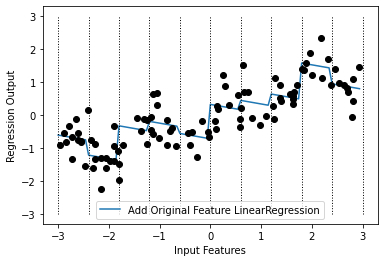

In [34]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Add Original Feature LinearRegression")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [35]:
# 상호작용 데이터를 추가하면 어떻게 될까요?
X_product = np.hstack([X_binned, X * X_binned]) # 구간 데이터 및 구간 데이터 * 구간
X_product.shape

(100, 20)

In [36]:
X_product[:2]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584]])

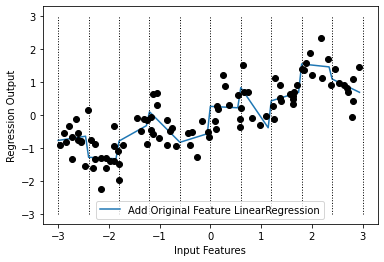

In [37]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label="Add Original Feature LinearRegression")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

### 다항식 추가
* 원본 특성에 다항식을 추가 
    * x가 있다면 x^2, x^3항을 추가정으로 생성

In [45]:
# PolynomialFeatures : 다항식 추가 클래스
from sklearn.preprocessing import PolynomialFeatures

'''
    degree : 차수( 특성에 몇 제곱까지 할 것인가 )
    include_bias : 특정한 편항을 추가 할지 말지 여부 (+ 1)
        * True : 11개의 특성 10( 제곱 ) + 1( bias )
'''

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

x_poly = ploy.transform(X)

x_poly.shape

(100, 10)

In [46]:
print("x 원소 : \n{}".format(X[:3]))
print("x_poly 원소 : \n{}".format(x_poly[:3]))

x 원소 : 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]]
x_poly 원소 : 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]]


In [47]:
"항 이름 : {}".format(poly.get_feature_names())

"항 이름 : ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']"

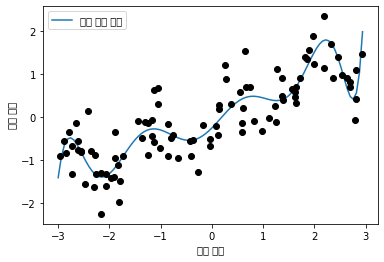

In [48]:
reg = LinearRegression().fit(x_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')
plt.show()

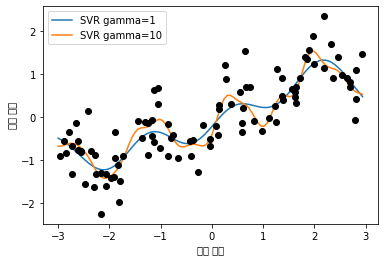

In [49]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')
plt.show()